# In this case study lets explain the linear regression and its types using boston dataset

# About Dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollors
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000 dollor's

## Import Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sks
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


Lets load the data

In [2]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
result_dataset = pd.DataFrame(data =np.zeros((6,6)) , index = ['r2_score','adjusted_r2_score','median_absolute_error','mean_squared_error','mean_absolute_percentage_error','mean_absolute_error'],columns = ['linear_regression','polynomial_linear_regression','step_wise_linear_regression','lasso_regression','ridge_regression','elasticnet_regression'])
result_dataset

,linear_regression,polynomial_linear_regression,step_wise_linear_regression,lasso_regression,ridge_regression,elasticnet_regression
r2_score,0.0,0.0,0.0,0.0,0.0,0.0
adjusted_r2_score,0.0,0.0,0.0,0.0,0.0,0.0
median_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_squared_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_percentage_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
result_dataset

,linear_regression,polynomial_linear_regression,step_wise_linear_regression,lasso_regression,ridge_regression,elasticnet_regression
r2_score,0.0,0.0,0.0,0.0,0.0,0.0
adjusted_r2_score,0.0,0.0,0.0,0.0,0.0,0.0
median_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_squared_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_percentage_error,0.0,0.0,0.0,0.0,0.0,0.0
mean_absolute_error,0.0,0.0,0.0,0.0,0.0,0.0


# lets start with linear regression

In [12]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


In [13]:
def metrics(y_true,y_pred,model = 'linear_regression'):
  r2_scores = r2_score(y_true,y_pred)
  p = 13 # number of features in the test dataset
  adjusted_r2_scores = 1- (1- r2_score(y_true,y_pred))*(len(y_true)-1)/(len(y_true)-p-1)
  median_absolute_errors = median_absolute_error(y_true,y_pred)
  mean_squared_errors = mean_squared_error(y_true,y_pred)
  mean_absolute_percentage_errors = mean_absolute_percentage_error(y_true,y_pred)
  mean_absolute_errors = mean_absolute_error(y_true,y_pred)
  result_dataset[model]['r2_score'] = r2_scores
  result_dataset[model]['adjusted_r2_score'] = adjusted_r2_scores
  result_dataset[model]['median_absolute_error'] = median_absolute_errors
  result_dataset[model]['mean_squared_error'] = mean_squared_errors
  result_dataset[model]['mean_absolute_percentage_error'] = mean_absolute_percentage_errors
  result_dataset[model]['mean_absolute_error'] = mean_absolute_errors
  print('r2_score for '+ model + " :" + str(r2_scores))
  print('adjusted_r2_score for '+ model + " :" + str(adjusted_r2_scores)) # Adj r2 = 1-(1-R2)*(n-1)/(n-p-1) Where n is the sample size and p is the number of independent variables.
  print('median_absolute_error for '+ model + " :" + str(median_absolute_errors))
  print('mean_squared_error for '+ model + " :" + str(mean_squared_errors))
  print('mean_absolute_percentage_error for '+ model + " :" + str(mean_absolute_percentage_errors))
  print('mean_absolute_error for '+ model + " :" + str(mean_absolute_errors))

metrics(y_test,y_pred,model = 'linear_regression')


r2_score for linear_regression :0.668759493535632
adjusted_r2_score for linear_regression :0.6198262368988503
median_absolute_error for linear_regression :2.3243319064123966
mean_squared_error for linear_regression :24.291119474973517
mean_absolute_percentage_error for linear_regression :0.16866394539378707
mean_absolute_error for linear_regression :3.1890919658878474



************* y_true vs y_pred ********************



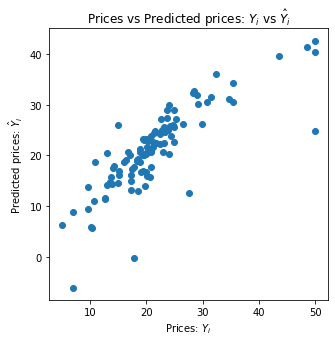


************** error distribution *******************



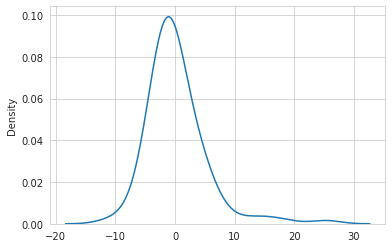


************** y_pred distribution *******************



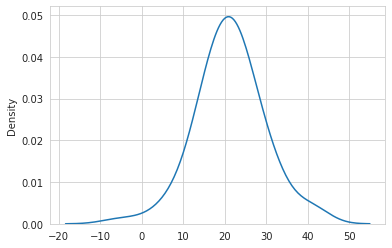

In [14]:
def plot(y_true,y_pred):
  plt.figure(figsize=(5, 5))
  plt.scatter(y_true, y_pred)
  plt.xlabel("Prices: $Y_i$")
  plt.ylabel("Predicted prices: $\hat{Y}_i$")
  plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
  print("\n************* y_true vs y_pred ********************\n")
  plt.show()
  delta_y = y_test - y_pred;
  sns.set_style('whitegrid')
  sns.kdeplot(np.array(delta_y), bw=0.5)
  print("\n************** error distribution *******************\n")
  plt.show()
  sns.set_style('whitegrid')
  sns.kdeplot(np.array(y_pred), bw=0.5)
  print("\n************** y_pred distribution *******************\n")
  plt.show()

plot(y_test,y_pred)

# polynomial linear regression



In [15]:
polynomial = PolynomialFeatures()
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly =  polynomial.transform(X_test) 

In [16]:
print(X_train.shape)
print(X_train_poly.shape)
print(X_test.shape)
print(X_test_poly.shape)

(404, 13)
(404, 105)
(102, 13)
(102, 105)


In [17]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)
y_pred = lm.predict(X_test_poly)

In [18]:
metrics(y_test,y_pred,model = 'polynomial_linear_regression')

r2_score for polynomial_linear_regression :0.8051515703732229
adjusted_r2_score for polynomial_linear_regression :0.7763671432692673
median_absolute_error for polynomial_linear_regression :1.9881347656249995
mean_squared_error for polynomial_linear_regression :14.28897248737952
mean_absolute_percentage_error for polynomial_linear_regression :0.13707252936269976
mean_absolute_error for polynomial_linear_regression :2.579373946844362



************* y_true vs y_pred ********************



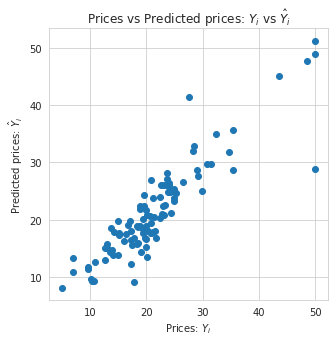


************** error distribution *******************



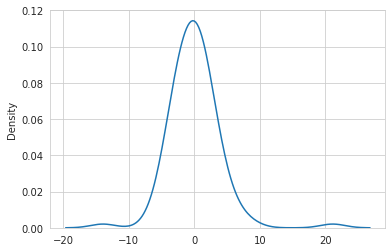


************** y_pred distribution *******************



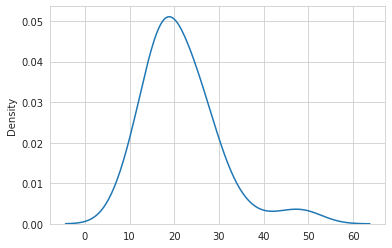

In [19]:
plot(y_test,y_pred)

In [20]:
result_dataset.style

,linear_regression,polynomial_linear_regression,step_wise_linear_regression,lasso_regression,ridge_regression,elasticnet_regression
r2_score,0.668759,0.805152,0.000000,0.000000,0.000000,0.000000
adjusted_r2_score,0.619826,0.776367,0.000000,0.000000,0.000000,0.000000
median_absolute_error,2.324332,1.988135,0.000000,0.000000,0.000000,0.000000
mean_squared_error,24.291119,14.288972,0.000000,0.000000,0.000000,0.000000
mean_absolute_percentage_error,0.168664,0.137073,0.000000,0.000000,0.000000,0.000000
mean_absolute_error,3.189092,2.579374,0.000000,0.000000,0.000000,0.000000


# Step wise linear regression

In [21]:
lm = LinearRegression()
sfs = SequentialFeatureSelector(lm, k_features=(1,10), forward=True, floating=False, verbose=0, scoring='neg_mean_absolute_percentage_error', cv = 10)
X_train_reduced = sfs.fit_transform(X_train, y_train)
X_test_reduced = sfs.transform(X_test)

In [22]:
# can use below metrics
sks.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [23]:
print(X_train.shape)
print(X_train_reduced.shape)
print(X_test.shape)
print(X_test_reduced.shape)

(404, 13)
(404, 8)
(102, 13)
(102, 8)


r2_score for step_wise_linear_regression :0.6230166483804656
adjusted_r2_score for step_wise_linear_regression :0.5673259259821253
median_absolute_error for step_wise_linear_regression :2.3134747103527307
mean_squared_error for step_wise_linear_regression :27.645615362718722
mean_absolute_percentage_error for step_wise_linear_regression :0.18212853079628213
mean_absolute_error for step_wise_linear_regression :3.4255824221260767

************* y_true vs y_pred ********************



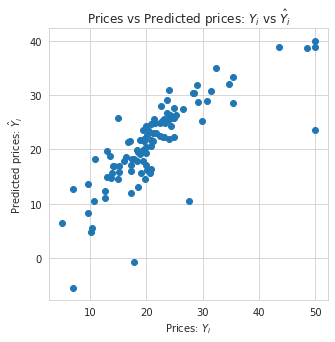


************** error distribution *******************



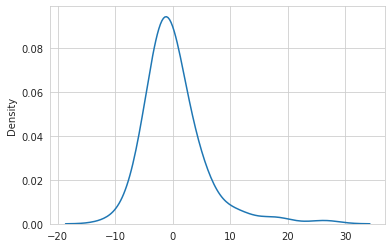


************** y_pred distribution *******************



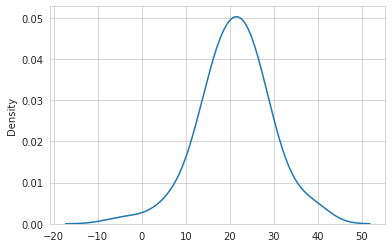

,linear_regression,polynomial_linear_regression,step_wise_linear_regression,lasso_regression,ridge_regression,elasticnet_regression
r2_score,0.668759,0.805152,0.623017,0.000000,0.000000,0.000000
adjusted_r2_score,0.619826,0.776367,0.567326,0.000000,0.000000,0.000000
median_absolute_error,2.324332,1.988135,2.313475,0.000000,0.000000,0.000000
mean_squared_error,24.291119,14.288972,27.645615,0.000000,0.000000,0.000000
mean_absolute_percentage_error,0.168664,0.137073,0.182129,0.000000,0.000000,0.000000
mean_absolute_error,3.189092,2.579374,3.425582,0.000000,0.000000,0.000000


In [24]:
lm.fit(X_train_reduced, y_train)
y_pred = lm.predict(X_test_reduced)
metrics(y_test,y_pred,model = 'step_wise_linear_regression')
plot(y_test,y_pred)
result_dataset.style

# lets try lasso regression

In [25]:
parameters = {'alpha' :  [float(x) for x in np.random.randint(1.0, high=100.0, size=100)]}
lasso = Lasso()
clf = GridSearchCV(lasso, parameters, cv = 10, scoring='neg_mean_absolute_percentage_error')
clf.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [22.0, 81.0, 33.0, 43.0, 1.0, 49.0, 69.0,
                                   61.0, 17.0, 27.0, 94.0, 28.0, 2.0, 88.0, 3.0,
                                   44.0, 82.0, 60.0, 17.0, 75.0, 58.0, 95.0,
                                   29.0, 94.0, 85.0, 44.0, 31.0, 56.0, 49.0,
                                   18.0, ...]},
             scoring='neg_mean_absolute_percentage_error')

In [26]:
print(clf.best_params_)


{'alpha': 1.0}


r2_score for lasso_regression :0.7322762586137166
adjusted_r2_score for lasso_regression :0.6927261604543793
median_absolute_error for lasso_regression :1.9923059231110019
mean_squared_error for lasso_regression :19.633194797692084
mean_absolute_percentage_error for lasso_regression :0.15467565721998525
mean_absolute_error for lasso_regression :2.8768762319799612

************* y_true vs y_pred ********************



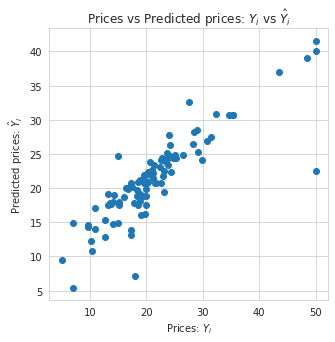


************** error distribution *******************



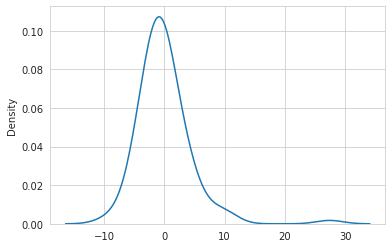


************** y_pred distribution *******************



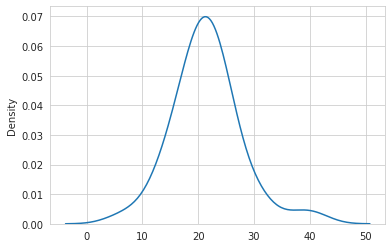

,linear_regression,polynomial_linear_regression,step_wise_linear_regression,lasso_regression,ridge_regression,elasticnet_regression
r2_score,0.668759,0.805152,0.623017,0.732276,0.000000,0.000000
adjusted_r2_score,0.619826,0.776367,0.567326,0.692726,0.000000,0.000000
median_absolute_error,2.324332,1.988135,2.313475,1.992306,0.000000,0.000000
mean_squared_error,24.291119,14.288972,27.645615,19.633195,0.000000,0.000000
mean_absolute_percentage_error,0.168664,0.137073,0.182129,0.154676,0.000000,0.000000
mean_absolute_error,3.189092,2.579374,3.425582,2.876876,0.000000,0.000000


In [27]:
y_pred = clf.predict(X_test_poly)
metrics(y_test,y_pred,model = 'lasso_regression')
plot(y_test,y_pred)
result_dataset.style

# lets try ridge regression

In [28]:
parameters = {'alpha' :  [float(x) for x in np.random.randint(1.0, high=100.0, size=100)]}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv = 10, scoring='neg_mean_absolute_percentage_error')
clf.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [81.0, 27.0, 84.0, 75.0, 45.0, 93.0, 32.0,
                                   47.0, 83.0, 22.0, 92.0, 53.0, 51.0, 52.0,
                                   49.0, 67.0, 90.0, 46.0, 49.0, 35.0, 83.0,
                                   41.0, 20.0, 38.0, 6.0, 56.0, 90.0, 86.0,
                                   62.0, 46.0, ...]},
             scoring='neg_mean_absolute_percentage_error')

In [29]:
print(clf.best_params_)

{'alpha': 47.0}


r2_score for ridge_regression :0.8213266335463774
adjusted_r2_score for ridge_regression :0.7949317044111831
median_absolute_error for ridge_regression :1.4183745400188759
mean_squared_error for ridge_regression :13.102793912034882
mean_absolute_percentage_error for ridge_regression :0.11080565722812495
mean_absolute_error for ridge_regression :2.111198401367274

************* y_true vs y_pred ********************



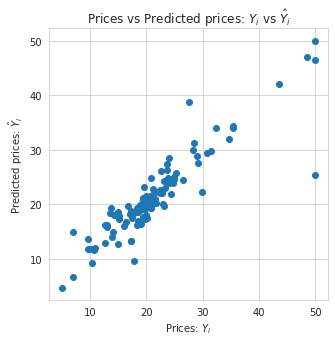


************** error distribution *******************



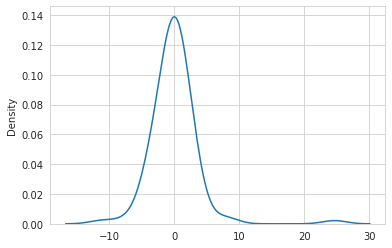


************** y_pred distribution *******************



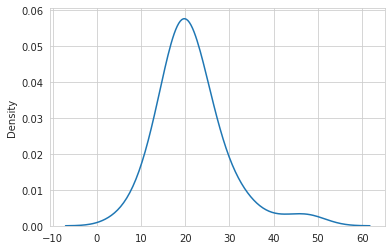

,linear_regression,polynomial_linear_regression,step_wise_linear_regression,lasso_regression,ridge_regression,elasticnet_regression
r2_score,0.668759,0.805152,0.623017,0.732276,0.821327,0.000000
adjusted_r2_score,0.619826,0.776367,0.567326,0.692726,0.794932,0.000000
median_absolute_error,2.324332,1.988135,2.313475,1.992306,1.418375,0.000000
mean_squared_error,24.291119,14.288972,27.645615,19.633195,13.102794,0.000000
mean_absolute_percentage_error,0.168664,0.137073,0.182129,0.154676,0.110806,0.000000
mean_absolute_error,3.189092,2.579374,3.425582,2.876876,2.111198,0.000000


In [30]:
y_pred = clf.predict(X_test_poly)
metrics(y_test,y_pred,model = 'ridge_regression')
plot(y_test,y_pred)
result_dataset.style

# lets try elasticnet

In [ ]:
parameters = {'alpha' :  [float(x) for x in np.random.randint(1.0, high=100.0, size=100)], 'l1_ratio' : [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elasticnet = ElasticNet()
clf = GridSearchCV(elasticnet, parameters, cv = 10, scoring='neg_mean_absolute_percentage_error')
clf.fit(X_train_poly, y_train)

In [32]:
print(clf.best_params_)

{'alpha': 2.0, 'l1_ratio': 0.0}


r2_score for elasticnet_regression :0.685972027248132
adjusted_r2_score for elasticnet_regression :0.6395815312734242
median_absolute_error for elasticnet_regression :2.409797082009119
mean_squared_error for elasticnet_regression :23.028859260061296
mean_absolute_percentage_error for elasticnet_regression :0.17484945304379684
mean_absolute_error for elasticnet_regression :3.1855863163067655

************* y_true vs y_pred ********************



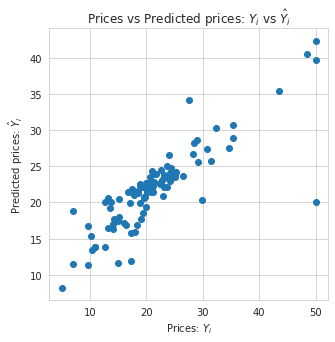


************** error distribution *******************



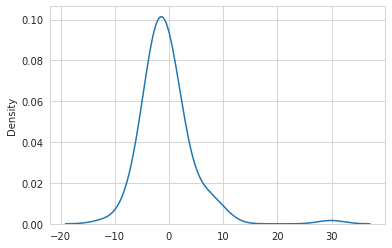


************** y_pred distribution *******************



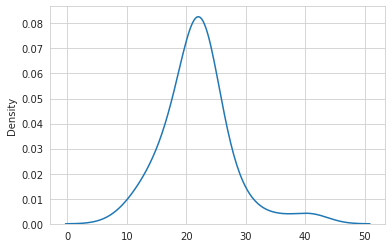

,linear_regression,polynomial_linear_regression,step_wise_linear_regression,lasso_regression,ridge_regression,elasticnet_regression
r2_score,0.668759,0.805152,0.623017,0.732276,0.821327,0.685972
adjusted_r2_score,0.619826,0.776367,0.567326,0.692726,0.794932,0.639582
median_absolute_error,2.324332,1.988135,2.313475,1.992306,1.418375,2.409797
mean_squared_error,24.291119,14.288972,27.645615,19.633195,13.102794,23.028859
mean_absolute_percentage_error,0.168664,0.137073,0.182129,0.154676,0.110806,0.174849
mean_absolute_error,3.189092,2.579374,3.425582,2.876876,2.111198,3.185586


In [33]:
y_pred = clf.predict(X_test_poly)
metrics(y_test,y_pred,model = 'elasticnet_regression')
plot(y_test,y_pred)
result_dataset.style

In [34]:
from tabulate import tabulate
print(tabulate(result_dataset.head(20), headers='keys', tablefmt='psql',showindex=True))

+--------------------------------+---------------------+--------------------------------+-------------------------------+--------------------+--------------------+-------------------------+
|                                |   linear_regression |   polynomial_linear_regression |   step_wise_linear_regression |   lasso_regression |   ridge_regression |   elasticnet_regression |
|--------------------------------+---------------------+--------------------------------+-------------------------------+--------------------+--------------------+-------------------------|
| r2_score                       |            0.668759 |                       0.805152 |                      0.623017 |           0.732276 |           0.821327 |                0.685972 |
| adjusted_r2_score              |            0.619826 |                       0.776367 |                      0.567326 |           0.692726 |           0.794932 |                0.639582 |
| median_absolute_error          |            2.32